<a href="https://colab.research.google.com/github/Ashnayak/Terrain-Identification-with-Time-Series-Data/blob/main/Ash_Test_v3_RF_NearMiss3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import imblearn
print(imblearn.__version__)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [65]:
from google.colab import files

In [23]:
import pandas as pd
import os
import re
import fnmatch
import sklearn

from numpy import genfromtxt
from pandas import DataFrame
import numpy as np
from imblearn.under_sampling import NearMiss
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.optimizers import Adam
# from keras.models import load_model
# from keras.callbacks import ModelCheckpoint

In [4]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [5]:
os.chdir("./gdrive/My Drive/")

In [6]:
ls

'Annual financial data.gsheet'               Google_Colab/
 AshwiniNayakResume_Jan20.pdf                merged_ADS_Ash_v2_6attributes.zip
'Colab Notebooks'/                           merged_ADS_Ash.zip
 Datasets-CyberBullying/                    'NN Iteration sheet.gsheet'
'DBMS Report 2.gdoc'                        'PDF slides'@
 ECE542_sp2021_Project_TerrainRecognition@   Screenshot_20201210-164649__01.jpg
 G10_HW2.gdoc                               'Untitled document.gdoc'
'Getting started.pdf'


In [7]:
 cd 'Google_Colab'

/content/gdrive/My Drive/Google_Colab


In [8]:
#Creating a file path and creating lists out of grouped filenames

listy= os.listdir("TrainingData")[1::]
Files_x = fnmatch.filter(listy, '*x.csv')
Files_x_time = fnmatch.filter(listy, '*x_time.csv')
Files_y = fnmatch.filter(listy, '*y.csv')
Files_y_time = fnmatch.filter(listy, '*y_time.csv')
listz= os.listdir('TestData')
listz
Test_Files_x = fnmatch.filter(listz, '*x.csv')
Test_Files_x_time = fnmatch.filter(listz, '*x_time.csv')
#Test_Files_y = fnmatch.filter(listz, '*y.csv')
Test_Files_y_time = fnmatch.filter(listz, '*y_time.csv')
Files_x

['subject_001_01__x.csv',
 'subject_001_06__x.csv',
 'subject_001_05__x.csv',
 'subject_001_03__x.csv',
 'subject_001_07__x.csv',
 'subject_001_08__x.csv',
 'subject_001_04__x.csv',
 'subject_002_05__x.csv',
 'subject_002_03__x.csv',
 'subject_002_01__x.csv',
 'subject_002_04__x.csv',
 'subject_001_02__x.csv',
 'subject_002_02__x.csv',
 'subject_003_01__x.csv',
 'subject_003_03__x.csv',
 'subject_003_02__x.csv',
 'subject_004_01__x.csv',
 'subject_004_02__x.csv',
 'subject_005_02__x.csv',
 'subject_005_01__x.csv',
 'subject_005_03__x.csv',
 'subject_006_01__x.csv',
 'subject_006_02__x.csv',
 'subject_006_03__x.csv',
 'subject_007_01__x.csv',
 'subject_007_03__x.csv',
 'subject_007_02__x.csv',
 'subject_007_04__x.csv',
 'subject_008_01__x.csv']

In [9]:
cd 'TrainingData'

/content/gdrive/My Drive/Google_Colab/TrainingData


In [14]:
files = sorted(set([x[:14] for x in Files_x]))
master_data = pd.DataFrame()
master_data_y = pd.DataFrame()
for file in files:
    y_data = pd.read_csv(file+"__y.csv", names = ["label"])
    y_time = pd.read_csv(file+"__y_time.csv", names = ["y_time"])
    x_data = pd.read_csv(file+"__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
    x_time = pd.read_csv(file+"__x_time.csv", names = ["x_time"])
    x_data["time"] = x_time["x_time"]    
    y_data["time"] = y_time["y_time"]    
    data = x_data.merge(y_data,how="outer", on = "time")
    data.sort_values("time", inplace =True)
#    data['drop_flag'] = data["label"].isnull()
    data["label"]=data["label"].fillna(method = "bfill")
    data["label"]=data["label"].fillna(method = "ffill")
    data = data.interpolate()
#    data = data[data["drop_flag"]]
#    data.drop("drop_flag", inplace = True,axis = 1)
    data["subject"] = file
    y_data["subject"] = file
    master_data = master_data.append(data)
    master_data_y = master_data_y.append(data)
    
# temp = master_data - master_data.groupby("subject").shift(1)
# temp = temp.drop(["label","subject"],axis=1).fillna(0)
# temp.columns = [x + "delta1" for x in temp.columns]
# master_data = pd.concat([master_data,temp],axis=1)
master_data.set_index(["subject","time"], inplace = True)
master_data_y.set_index(["subject","time"], inplace = True)
master_data.head()
len(master_data)

1677059

In [15]:
master_data.head(20)

accr_x    accr_y    accr_z  ...     gyr_y     gyr_z  label
subject        time                                 ...                           
subject_001_01 0.000  4.435275  8.196063  2.974488  ... -0.039157 -0.016744    0.0
               0.020  4.311097  8.270259  2.941273  ... -0.021818 -0.010045    0.0
               0.025  4.186920  8.344455  2.908057  ... -0.004480 -0.003345    0.0
               0.050  4.544637  8.408659  2.890000  ...  0.022412  0.001159    0.0
               0.075  4.849308  8.411614  2.900692  ... -0.010670 -0.014223    0.0
               0.100  4.509190  8.118649  2.847298  ... -0.045498 -0.021111    0.0
               0.120  4.367852  8.196228  2.849520  ... -0.022526 -0.018970    0.0
               0.125  4.226515  8.273807  2.851742  ...  0.000445 -0.016830    0.0
               0.150  4.532063  8.398341  2.856682  ...  0.028769 -0.011091    0.0
               0.175  4.433669  8.294719  2.823521  ... -0.029434 -0.008998    0.0
               0.200  4.160676  8.260676  2.827568  ... -0.016748 -0.006027    0.0
               0.220  4.296720  8.266644  2.808809  ...  0.003173  0.003098    0.0
               0.225  4.432763  8.272613  2.790050  ...  0.023094  0.012222    0.0
               0.250  4.511362  8.256774  2.820538  ...  0.001547  0.011137    0.0
               0.275  4.098018  8.154184  2.901101  ... -0.042853  0.005031    0.0
               0.300  3.931769  8.203628  2.958186  ... -0.006177  0.016877    0.0
               0.320  4.228047  8.325295  2.916271  ...  0.015066  0.031164    0.0
               0.325  4.524325  8.446963  2.874356  ...  0.036310  0.045451    0.0
               0.350  4.615744  8.385348  2.782674  ...  0.012677  0.054444    0.0
               0.375  4.392814  8.239121  2.830176  ...  0.015576  0.052817    0.0

[20 rows x 7 columns]

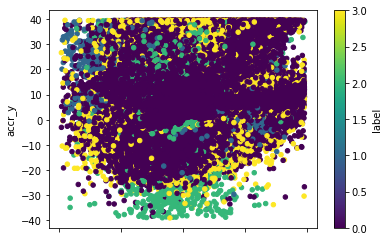

In [20]:
master_data.plot.scatter(x='accr_x', y='accr_y', c='label', colormap='viridis')

In [16]:
len(master_data)
master_data["label"].value_counts()

0.0    1258659
3.0     258045
2.0      91335
1.0      69020
Name: label, dtype: int64

In [17]:
#master_data.to_csv (r'C:\Users\ashnayak\Desktop\NCSU\NCSU Neural Nets\Project C\ECE542_sp2021_Project_TerrainRecognition\Ash\merged_ADS_Ash_v2_6attributes.csv', index = False, header=True)

In [18]:
X = master_data.drop("label", axis=1)
y = master_data["label"]

In [ ]:
# counter = Counter(y)
# print(counter)

# oversample = SMOTE()
# Xsmote, Ysmote = oversample.fit_resample(X, y)

# counter = Counter(Ysmote)
# print(counter)

In [27]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [28]:
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X_1, y_1 = undersample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [29]:
# counter = Counter(y_train)
# print(counter)

# oversample = SMOTE()
# Xsmote, Ysmote = oversample.fit_resample(X_train, y_train)

# counter = Counter(Ysmote)
# print(counter)

In [31]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_1,y_1)
# predictions
rfc_predict = rfc.predict(X_test)

In [47]:
def nn_interpolate(A, new_size):
    """Vectorized Nearest Neighbor Interpolation"""

    old_size = A.shape
    row_ratio, col_ratio = np.array(new_size) / np.array(old_size)

    # row wise interpolation
    row_idx = (np.ceil(range(1, 1 + int(old_size[0] * row_ratio)) / row_ratio) - 1).astype(int)

    final_matrix = A[row_idx]

    return final_matrix

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#rfc_cv_score = cross_val_score(rfc, X, y, cv=3, scoring="roc_auc")

In [35]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
#print(rfc_cv_score)
#print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[115533  38032  66866 194739]
 [  4780  12537   1433   3751]
 [  2170   1433  24592   1972]
 [ 15781   7940   6333  55538]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.84      0.28      0.42    415170
         1.0       0.21      0.56      0.30     22501
         2.0       0.25      0.82      0.38     30167
         3.0       0.22      0.65      0.33     85592

    accuracy                           0.38    553430
   macro avg       0.38      0.57      0.36    553430
weighted avg       0.68      0.38      0.40    553430



=== All AUC Scores ===


In [39]:
cd ..

/content/gdrive/My Drive/Google_Colab


In [41]:
cd 'TestData'

/content/gdrive/My Drive/Google_Colab/TestData


In [69]:
testingX_009 = pd.read_csv("subject_009_01__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
testingX_time_009 = pd.read_csv("subject_009_01__x_time.csv", names = ["x_time"])
testingY_time_009 = pd.read_csv("subject_009_01__y_time.csv", names = ["time"])
testingY_time_009.head()

,time
0,0.02
1,0.12
2,0.22
3,0.32
4,0.42


In [70]:
x_data = testingX_009
y_time = testingY_time_009
x_data["time"] = x_time["x_time"]  

data = x_data.merge(y_time,how="outer", on = "time")
data.sort_values("time", inplace =True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace = True,axis = 1)
data.head(20)
#len(data)


# temp = data - data.shift(1)
# temp = temp.fillna(0)
# temp.columns = [x + "delta1" for x in temp.columns]
# data = pd.concat([data,temp],axis=1)
data.set_index(["time"], inplace = True)
# master_data_y.set_index(["subject","time"], inplace = True)
data.head()
# len(master_data)

,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z
time,,,,,,
0.02,0.405320,8.708449,-4.466125,0.000556,-0.005863,0.005649
0.12,0.492617,8.715558,-4.495296,0.000102,0.006652,0.006952
0.22,0.455268,8.716808,-4.487077,0.001029,0.005111,0.003036
0.32,0.464851,8.709219,-4.460000,-0.000370,0.003656,0.003656
0.42,0.458229,8.712744,-4.476527,0.002437,0.001799,0.002459


In [72]:
import numpy as np
y_pred_009 = rfc.predict(data)

print(y_pred_009.shape)
validationX_009 = pd.read_csv("subject_009_01__y_time.csv", header=None)

interpolated_data_009 = nn_interpolate(y_pred_009, (validationX_009.shape[0], validationX_009.shape[1]))
print(interpolated_data_009.shape)

sub009df = pd.DataFrame()
sub009df["y_pred"] = interpolated_data_009
sub009df.y_pred.value_counts()
sub009df.to_csv('subject_009_01__y_prediction.csv') 
files.download('subject_009_01__y_prediction.csv')
#sub009df.to_csv (r'C:\Users\ashnayak\Desktop\NCSU\NCSU Neural Nets\Project C\ECE542_sp2021_Project_TerrainRecognition\Ash\subject_009_01__y_prediction.csv', index = False, header=True)


(9498,)
(9498,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
testingX_010 = pd.read_csv("subject_010_01__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
testingX_time_010 = pd.read_csv("subject_010_01__x_time.csv", names = ["x_time"])
testingY_time_010 = pd.read_csv("subject_010_01__y_time.csv", names = ["time"])
testingY_time_010.head()

,time
0,0.02
1,0.12
2,0.22
3,0.32
4,0.42


In [74]:
x_data = testingX_010
y_time = testingY_time_010
x_data["time"] = x_time["x_time"]  

data = x_data.merge(y_time,how="outer", on = "time")
data.sort_values("time", inplace =True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace = True,axis = 1)
data.head(20)
#len(data)


# temp = data - data.shift(1)
# temp = temp.fillna(0)
# temp.columns = [x + "delta1" for x in temp.columns]
# data = pd.concat([data,temp],axis=1)
data.set_index(["time"], inplace = True)
# master_data_y.set_index(["subject","time"], inplace = True)
data.head()
# len(master_data)

,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z
time,,,,,,
0.02,1.638187,9.649387,0.218060,-0.000485,-0.001431,-0.012855
0.12,1.586369,9.642326,0.216732,-0.001636,-0.006556,-0.006438
0.22,1.610607,9.639363,0.228534,0.001169,-0.000148,-0.004423
0.32,1.579946,9.643832,0.222473,-0.000012,-0.002273,-0.000363
0.42,1.554924,9.653587,0.242527,-0.001563,0.003750,0.003889


In [75]:
import numpy as np
y_pred_010 = rfc.predict(data)

print(y_pred_010.shape)
validationX_010 = pd.read_csv("subject_010_01__y_time.csv", header=None)

interpolated_data_010 = nn_interpolate(y_pred_010, (validationX_010.shape[0], validationX_010.shape[1]))
print(interpolated_data_010.shape)

sub010df = pd.DataFrame()
sub010df["y_pred"] = interpolated_data_010
sub010df.y_pred.value_counts()
sub010df.to_csv('subject_010_01__y_prediction.csv') 
files.download('subject_010_01__y_prediction.csv')
#sub010df.to_csv (r'C:\Users\ashnayak\Desktop\NCSU\NCSU Neural Nets\Project C\ECE542_sp2021_Project_TerrainRecognition\Ash\subject_010_01__y_prediction.csv', index = False, header=True)


(12270,)
(12270,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
testingX_011 = pd.read_csv("subject_011_01__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
testingX_time_011 = pd.read_csv("subject_011_01__x_time.csv", names = ["x_time"])
testingY_time_011 = pd.read_csv("subject_011_01__y_time.csv", names = ["time"])
testingY_time_011.head()

,time
0,0.02
1,0.12
2,0.22
3,0.32
4,0.42


In [77]:
x_data = testingX_011
y_time = testingY_time_011
x_data["time"] = x_time["x_time"]  

data = x_data.merge(y_time,how="outer", on = "time")
data.sort_values("time", inplace =True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace = True,axis = 1)
data.head(20)
#len(data)


# temp = data - data.shift(1)
# temp = temp.fillna(0)
# temp.columns = [x + "delta1" for x in temp.columns]
# data = pd.concat([data,temp],axis=1)
data.set_index(["time"], inplace = True)
# master_data_y.set_index(["subject","time"], inplace = True)
data.head()
# len(master_data)

,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z
time,,,,,,
0.02,0.472646,8.442239,4.895000,-0.003342,-0.008138,-0.009979
0.12,0.529313,8.449321,4.891995,0.003333,0.007441,0.013408
0.22,0.599473,8.439262,4.870000,0.004878,-0.000661,-0.003626
0.32,0.490513,8.440615,4.886540,0.000044,0.001931,-0.002720
0.42,0.549082,8.420000,4.914359,0.002079,0.005036,0.004444


In [78]:
import numpy as np
y_pred_011 = rfc.predict(data)

print(y_pred_011.shape)
validationX_011 = pd.read_csv("subject_011_01__y_time.csv", header=None)

interpolated_data_011 = nn_interpolate(y_pred_011, (validationX_011.shape[0], validationX_011.shape[1]))
print(interpolated_data_011.shape)

sub011df = pd.DataFrame()
sub011df["y_pred"] = interpolated_data_011
sub011df.y_pred.value_counts()
sub011df.to_csv('subject_011_01__y_prediction.csv') 
files.download('subject_011_01__y_prediction.csv')
#sub011df.to_csv (r'C:\Users\ashnayak\Desktop\NCSU\NCSU Neural Nets\Project C\ECE542_sp2021_Project_TerrainRecognition\Ash\subject_011_01__y_prediction.csv', index = False, header=True)


(12940,)
(12940,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
testingX_012 = pd.read_csv("subject_012_01__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
testingX_time_012 = pd.read_csv("subject_012_01__x_time.csv", names = ["x_time"])
testingY_time_012 = pd.read_csv("subject_012_01__y_time.csv", names = ["time"])
testingY_time_012.head()

,time
0,0.02
1,0.12
2,0.22
3,0.32
4,0.42


In [80]:
x_data = testingX_012
y_time = testingY_time_012
x_data["time"] = x_time["x_time"]  

data = x_data.merge(y_time,how="outer", on = "time")
data.sort_values("time", inplace =True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace = True,axis = 1)
data.head(20)
#len(data)


# temp = data - data.shift(1)
# temp = temp.fillna(0)
# temp.columns = [x + "delta1" for x in temp.columns]
# data = pd.concat([data,temp],axis=1)
data.set_index(["time"], inplace = True)
# master_data_y.set_index(["subject","time"], inplace = True)
data.head()
# len(master_data)

,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z
time,,,,,,
0.02,-0.238852,9.065000,3.489485,0.002709,-0.004129,-0.003629
0.12,-0.240855,9.065000,3.465224,0.003574,-0.002318,-0.003164
0.22,-0.206497,9.079217,3.472257,-0.001656,0.001677,-0.004020
0.32,-0.266544,9.070161,3.490426,0.000897,0.001360,-0.001281
0.42,-0.180694,9.066498,3.477377,0.000727,-0.005213,-0.004444


In [81]:
import numpy as np
y_pred_012 = rfc.predict(data)

print(y_pred_012.shape)
validationX_012 = pd.read_csv("subject_012_01__y_time.csv", header=None)

interpolated_data_012 = nn_interpolate(y_pred_012, (validationX_012.shape[0], validationX_012.shape[1]))
print(interpolated_data_012.shape)

sub012df = pd.DataFrame()
sub012df["y_pred"] = interpolated_data_012
sub012df.y_pred.value_counts()
sub012df.to_csv('subject_012_01__y_prediction.csv') 
files.download('subject_012_01__y_prediction.csv')
#sub012df.to_csv (r'C:\Users\ashnayak\Desktop\NCSU\NCSU Neural Nets\Project C\ECE542_sp2021_Project_TerrainRecognition\Ash\subject_012_01__y_prediction.csv', index = False, header=True)


(11330,)
(11330,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25, 50, 100], 'max_features': [5, 10]}
]

In [59]:
# grid_search_forest = GridSearchCV(rfc, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search_forest.fit(X_,Ysmote)

In [61]:
# cvres = grid_search_forest.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)
